## Importing Libraries




In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [3]:
os.listdir('Resume_Docx/')

['.ipynb_checkpoints',
 'SQL Developer',
 'React JS Developer',
 'Workday',
 'PeopleSoft']

## Exctract the Text from Data

### PeopleSoft dataset

In [4]:
file_path1 = []
category1  = []
directory1 = 'Resume_Docx/PeopleSoft/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [5]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
5,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
7,Classification: Internal\n\nClassification: In...,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft


### React JS developer dataset

In [6]:
file_path2 = []
category2  = []
directory2 = 'Resume_Docx/React JS Developer/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [7]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer
1,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer
2,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer
4,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer
5,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
6,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
7,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer
8,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
9,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer


### SQL Developer dataset

In [8]:
file_path3 = []
category3  = []
directory3 = 'Resume_Docx/SQL Developer/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [9]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,KAMBALLA PRADEEP ...,SQL Developer
2,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer
3,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
4,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
5,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
6,BUDDHA VAMSI ...,SQL Developer
7,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
8,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
9,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer


### Workday dataset

In [10]:
file_path4 = []
category4  = []
directory4 = 'Resume_Docx/Workday/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [11]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
1,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
2,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
3,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
4,Vinay kumar .v\nWorkday Functional Consultant\...,Workday
5,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
6,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
7,G Himaja\n\n ...,Workday
8,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
9,Workday HCM Techno functional Consultant ...,Workday


## Creating a DataFrame

In [12]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN
5,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
7,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN


In [13]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  49 non-null     object
 1   Category1    10 non-null     object
 2   Category2    17 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.0+ KB


### Merging all categories in One Column

In [14]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
5,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
7,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft


In [15]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

### Final Dataset

In [16]:
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
5,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
6,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
7,PeopleSoft,Classification: Internal\n\nClassification: In...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [17]:
resume_data["Raw_Details"][4]

"C O N T A C T :\n\n\n\nAddress: Manyata Tech Park,\n\nNagavara, Bangalore 560045\n\n\n\nLinIn: subha-santosh-b16698139\n\n\n\nS K I L L S :\n\n\n\nPeopleSoft Finance FSCM ARIBA\n\nJAVA Full Stack Development SQL\n\nPower BI\n\n\n\nI N T E R E S T S :\n\n\n\nLearning new Technologies. Planting Hybrid Species.\n\nCooking. Travelling Singing.\n\n\n\nS T R E N G T H S :\n\n\n\nTime Management. Responsible for my deliverables.\n\nLeadership qualities.\n\n\n\nL A N G U A G E S :\n\n\n\nJapanese.\n\nFrench (Started Learning).\n\n\nSRI SUBHA SANTOSH KUMAR JOSYULA\n\nA S S O C I A T E C O N S U L T A N T\n\nP R O F E S S I O N A L S U M M A R Y :\n\n\n\nI am having more than 3.2 years of experience in assistance and development for projects like ARIBA and PEOPLESOFT FINANCE . I have successfully completed TOOLS PATCH and TOOLS UPGRADE PROJECT with 0% refuse validations. I am the main Point of contact in Non Regression Testing and User Acceptance Testing. I am responsible to find solutions whic

### Saving as a CSV File

In [18]:
resume_data.to_csv('Raw_Resumes.csv', index=False)

## EDA

In [20]:
resume_data = pd.read_csv("Raw_Resumes.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
5,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
6,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
7,PeopleSoft,Classification: Internal\n\nClassification: In...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [21]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
38,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
39,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
40,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
41,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
42,Workday,Vinay kumar .v\nWorkday Functional Consultant\...
43,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
44,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
45,Workday,G Himaja\n\n ...
46,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
47,Workday,Workday HCM Techno functional Consultant ...


In [22]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

### Number of Words in each Resume

In [23]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,448
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356


### Number of Characters

In [24]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,3714
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,3669
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,2150


### Stopwords

In [27]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,88
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,84
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,42


### Numerics

In [28]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,13
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,13
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,8


In [29]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
3,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
5,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
6,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
7,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3


## Text Pre-Processing

### Using User Defined Function

In [30]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [32]:
resume_data = pd.read_csv('Raw_Resumes.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

### Text Cleaning from Resume

In [33]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
5,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
6,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
7,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...


### Saving the Cleaned Data in new CSV File

In [34]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,hari narayana professional summary years exper...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,murali professional summary years experience p...
4,PeopleSoft,address manyata tech park nagavara bangalore l...
5,PeopleSoft,peoplesoft administration vivekanand sayana ca...
6,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
7,PeopleSoft,classification internal classification interna...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,priyabrata hota career objective pursuing peop...


In [35]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [36]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,hari narayana professional summary years exper...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,murali professional summary years experience p...
4,PeopleSoft,address manyata tech park nagavara bangalore l...
5,PeopleSoft,peoplesoft administration vivekanand sayana ca...
6,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
7,PeopleSoft,classification internal classification interna...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,priyabrata hota career objective pursuing peop...


In [37]:
resume_data.Resume_Details[5]

'peoplesoft administration vivekanand sayana career objective valid expertise years peoplesoft hope enhance skill set adding value business enable implementation solutions aid company objectives understanding anticipating needs interests motivations clients deliver time budget quality delivering value improving agility quality reliability professional summary years experience peoplesoft implementation support configuration migrations maintenance administration application server domains process scheduler servers web server domains peopletools upgrades application updates pum ses elastic search experience integration activities various peoplesoft financials hrms epm fscm environments extensively involved resolving performance issues experience driving infrastructure hardware upgrades disaster recovery activities experience health check peoplesoft environments experience peoplesoft database refreshes production development testing environments experience performance tuning application se

## Named Entity Recognition (NER)

In [39]:
nltk.download('punkt')
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('experience', 324), ('using', 241), ('workday', 232), ('sql', 211), ('application', 208), ('server', 188), ('project', 180), ('data', 179), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 138), ('react', 128), ('process', 123), ('system', 111), ('knowledge', 109), ('skills', 105), ('client', 105), ('tools', 102), ('working', 100), ('database', 99), ('involved', 98), ('various', 97), ('creating', 95), ('hcm', 94), ('support', 93), ('like', 93), ('worked', 93), ('integrations', 92), ('development', 90), ('developer', 90), ('good', 88), ('technical', 87), ('servers', 86), ('integration', 84), ('report', 83), ('people', 81), ('created', 80), ('services', 79), ('used', 77), ('design', 76), ('role', 74), ('responsibilities', 72), ('team', 71), ('studio', 71), ('html', 71), ('eib', 71), ('work', 69), ('professional', 68), ('security', 68)]


## Parts Of Speech (POS) Tagging

In [47]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
import spacy

nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [48]:
for token in doc_block[:30]:
    print(token,token.pos_)

d PROPN
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN
role PROPN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


### Checking for all the Nouns and Verbs

In [49]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulne

In [50]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,292
1,using,232
2,application,207
3,workday,192
4,reports,170
5,data,169
6,project,164
7,business,158
8,web,133
9,react,128


### Visualization

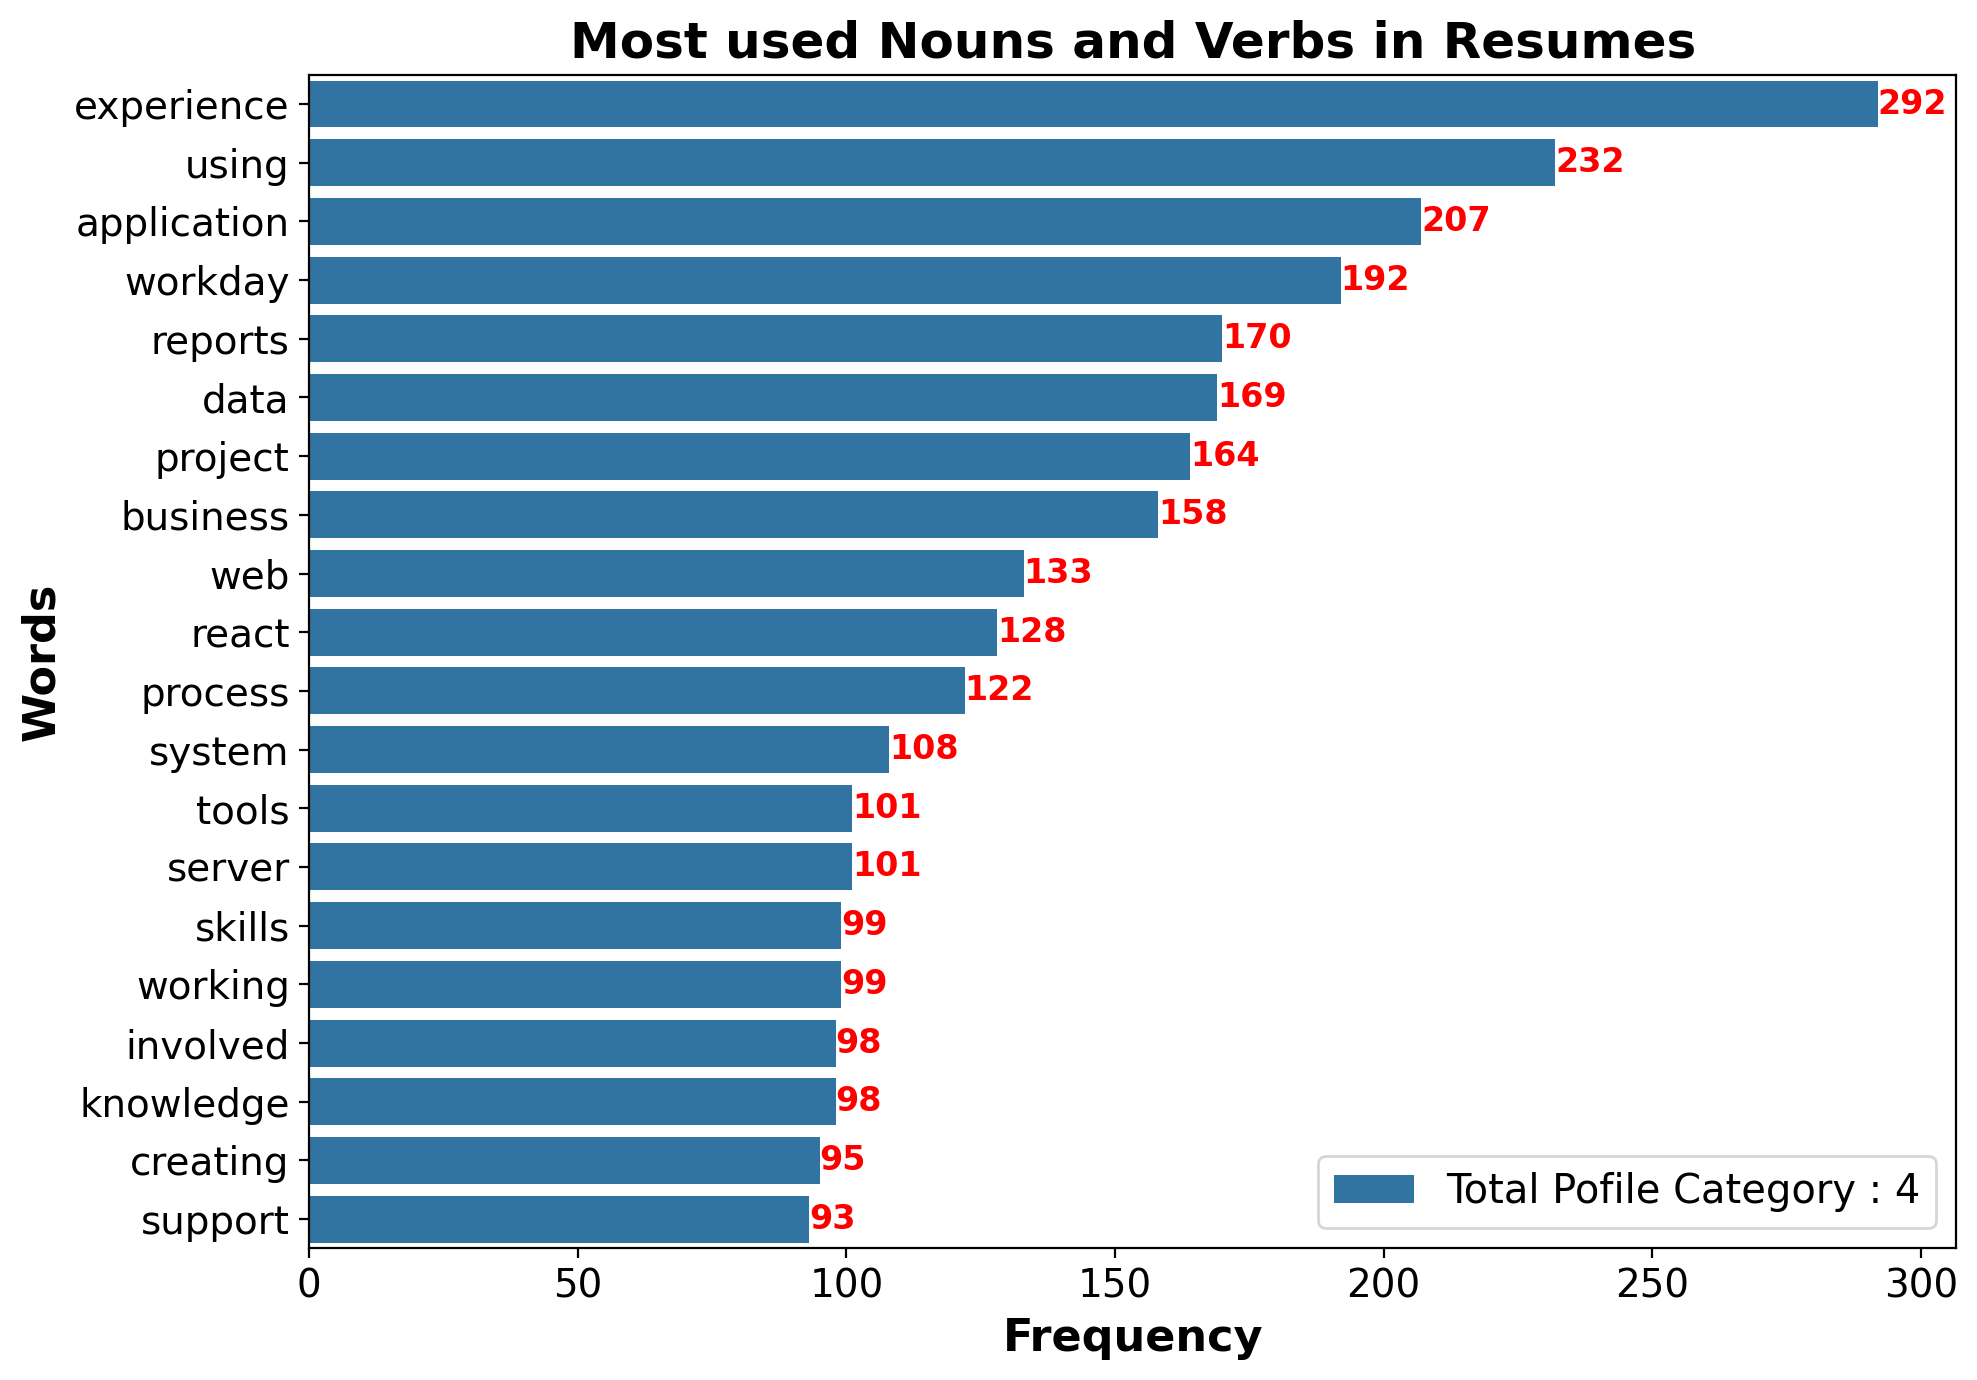

In [55]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'red', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Nouns_Verbs_Bar', dpi = 500)

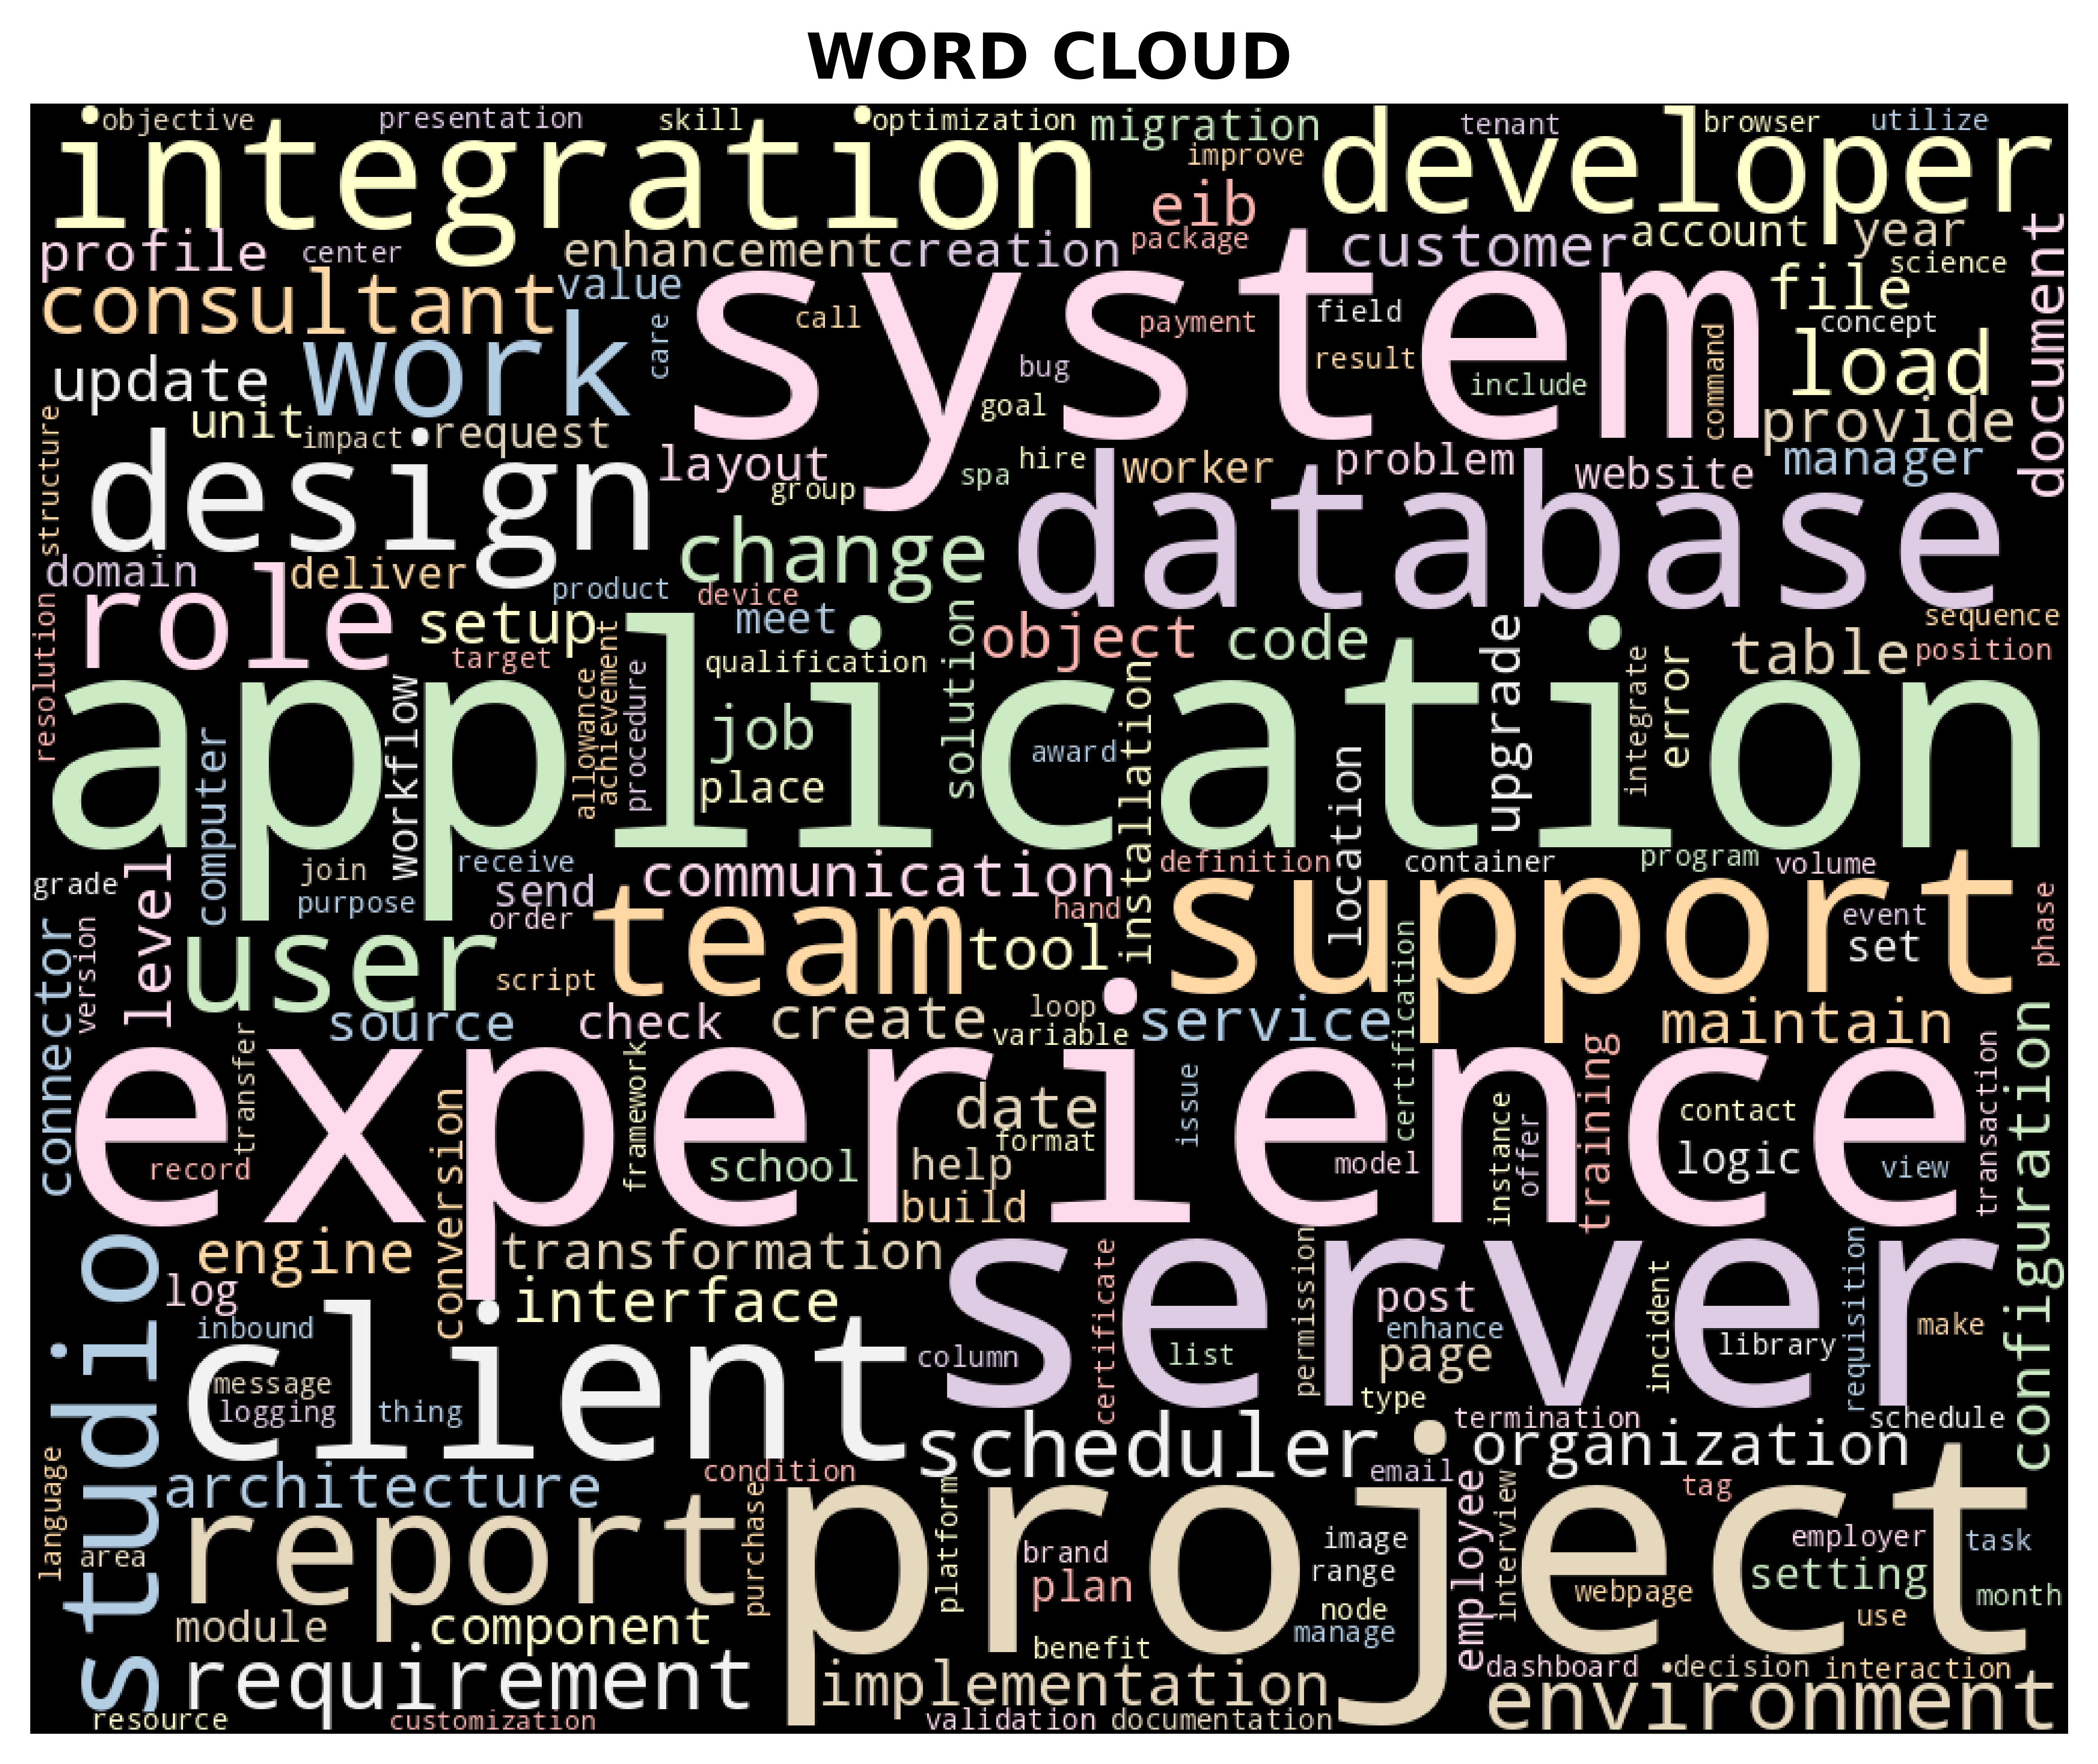

In [54]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('WORD CLOUD', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds_Noun_Verb.png')
plt.show()